# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

In [4]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow.parquet as pq

## Q1

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

### Q1.1

In [25]:

file = "./data/airbnb_hw.csv"
df = pd.read_csv(file)
print(df)

        Host Id Host Since                                Name Neighbourhood   \
0       5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1      33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2      39608626        NaN                Sunny Room in Harlem      Manhattan   
3           500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4           500  6/26/2008            Trendy Times Square Loft      Manhattan   
...         ...        ...                                 ...            ...   
30473  43022976  8/31/2015   10 Mins to Time Square/two floors         Queens   
30474  42993382  8/31/2015       1BR ocean view & F,Q train st       Brooklyn   
30475  43033067  8/31/2015                Amazing Private Room       Brooklyn   
30476  43000991  8/31/2015   Charming private female room: UWS      Manhattan   
30477  42999189  8/31/2015    Huge Beautiful Bedroom - Astoria         Queens   

      Property Type  Review

In [7]:
print(df['Price'])

      Price
0       145
1        37
2        28
3       199
4       549
...     ...
30473   300
30474   125
30475    80
30476    35
30477    80

[30478 rows x 1 columns]


In [8]:
df.isnull().sum()
# price has all of its values, so I don't have to drop any vals

Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
dtype: int64

In [9]:
df.describe()
# price doesn't show up, which means it is not considered numerical

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Review Scores Rating
count,3.047800e+04,22155.000000,30344.000000,30393.000000,30478.0,30478.000000,22155.000000
mean,1.273171e+07,90.738659,10584.854831,1.530089,1.0,12.018735,91.993230
std,1.190270e+07,9.059519,921.299397,1.015359,0.0,21.980703,8.850373
min,5.000000e+02,20.000000,1003.000000,0.000000,1.0,0.000000,20.000000
25%,2.701298e+06,85.000000,10017.000000,1.000000,1.0,0.000000,89.000000
50%,8.551693e+06,90.000000,10065.000000,1.000000,1.0,3.000000,94.000000
75%,2.120617e+07,100.000000,11216.000000,2.000000,1.0,13.000000,100.000000
max,4.303307e+07,100.000000,99135.000000,16.000000,1.0,257.000000,100.000000


In [18]:
commas_price = df[df['Price'].str.contains(',')]
print(commas_price)
# see if prices have commas

        Host Id Host Since                                 Name  \
101        8730  2/27/2009                Comfort & Convenience   
263       34915  8/30/2009  Luxurious 2-Floor Manhattan Mansion   
764      112879  4/23/2010  Modern Luxury Meets Old Money Charm   
1272     214148  8/26/2010     LARGE, COMFY 1BDR W/CHARACTER!!!   
1275     213266  8/26/2010   Beautiful 1 Bedroom in Nolita/Soho   
...         ...        ...                                  ...   
28951  37155810  6/30/2015         Central Park Luxury : 115916   
28952  37155810  6/30/2015    Central Park South Place : 112756   
28953  37155810  6/30/2015    Central Park South Views : 112754   
28985  37241813   7/1/2015    VERY Spacious 3BR in East Village   
30281  42160989  8/21/2015         Luxury Duplex for Pope Visit   

      Neighbourhood  Property Type  Review Scores Rating (bin)  \
101        Manhattan   Condominium                       100.0   
263        Manhattan     Apartment                         NaN 

In [20]:
commas_price['Price'] = commas_price['Price'].str.replace(',', '').astype(float)
# isolate them into its own df so I can experiment without corrupting the original df

/tmp/ipykernel_1081722/1623114500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commas_price['Price'] = commas_price['Price'].str.replace(',', '').astype(float)


In [22]:
print(commas_price['Price'])
# now that I know it works, I will convert the original df

101      1990.0
263      1000.0
764      1200.0
1272     1000.0
1275     5000.0
          ...  
28951    3390.0
28952    1356.0
28953    2599.0
28985    2000.0
30281    2000.0
Name: Price, Length: 181, dtype: float64


In [23]:
commas_price.describe()


,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
count,1.810000e+02,51.000000,181.000000,179.000000,181.0,181.000000,181.000000,51.000000
mean,1.062796e+07,94.019608,10259.834254,3.346369,1.0,2.740331,1876.408840,94.823529
std,9.306978e+06,9.900485,474.078504,2.909231,0.0,7.493255,1288.395138,9.764642
min,8.730000e+03,40.000000,10001.000000,1.000000,1.0,0.000000,1000.000000,40.000000
25%,2.813178e+06,90.000000,10011.000000,2.000000,1.0,0.000000,1000.000000,93.500000
50%,1.058152e+07,95.000000,10019.000000,3.000000,1.0,0.000000,1500.000000,98.000000
75%,1.166865e+07,100.000000,10065.000000,4.000000,1.0,1.000000,2000.000000,100.000000
max,4.216099e+07,100.000000,11418.000000,16.000000,1.0,48.000000,10000.000000,100.000000


In [24]:
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df.describe()
# price shows up now which means price is now a numerical value

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
count,3.047800e+04,22155.000000,30344.000000,30393.000000,30478.0,30478.000000,30478.000000,22155.000000
mean,1.273171e+07,90.738659,10584.854831,1.530089,1.0,12.018735,163.589737,91.993230
std,1.190270e+07,9.059519,921.299397,1.015359,0.0,21.980703,197.785454,8.850373
min,5.000000e+02,20.000000,1003.000000,0.000000,1.0,0.000000,10.000000,20.000000
25%,2.701298e+06,85.000000,10017.000000,1.000000,1.0,0.000000,80.000000,89.000000
50%,8.551693e+06,90.000000,10065.000000,1.000000,1.0,3.000000,125.000000,94.000000
75%,2.120617e+07,100.000000,11216.000000,2.000000,1.0,13.000000,195.000000,100.000000
max,4.303307e+07,100.000000,99135.000000,16.000000,1.0,257.000000,10000.000000,100.000000


In [26]:
df.isnull().sum()
# still no missing vals for price, which means it was all successfully converted

Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
dtype: int64

### Q1.2

In [27]:
file = "./data/mn_police_use_of_force.csv"
df = pd.read_csv(file)
print(df)

         response_datetime               problem is_911_call primary_offense  \
0      2016/01/01 00:47:36  Assault in Progress          Yes          DASLT1   
1      2016/01/01 02:19:34                Fight           No          DISCON   
2      2016/01/01 02:19:34                Fight           No          DISCON   
3      2016/01/01 02:28:48                Fight           No          PRIORI   
4      2016/01/01 02:28:48                Fight           No          PRIORI   
...                    ...                   ...         ...             ...   
12920  2021/08/30 21:38:46  Assault in Progress          Yes        ASLT5      
12921  2021/08/30 22:32:22      Unwanted Person          Yes        CIC        
12922  2021/08/31 12:03:08       Overdose w/All          Yes        FORCE      
12923  2021/08/31 12:52:52      Attempt Pick-Up           No        WT         
12924  2021/08/31 21:34:29      Unwanted Person           No        FORCE      

      subject_injury         force_type

In [28]:
df.isnull().sum()
# many subject injury missing, 9848 is missing, a non negligible amount

response_datetime       0
problem                 0
is_911_call             0
primary_offense         0
subject_injury       9848
force_type              0
force_type_action       0
race                 1024
sex                   501
age                  1066
type_resistance      2986
precinct                0
neighborhood            4
dtype: int64

In [34]:
cross_tab = pd.crosstab(df["force_type"], df["subject_injury"])
print(cross_tab)
# can't see Na

subject_injury            No   Yes
force_type                        
Baton                      0     2
Bodily Force            1093  1286
Chemical Irritant        131    41
Firearm                    2     0
Gun Point Display         33    44
Improvised Weapon         34    40
Less Lethal Projectile     1     2
Police K9 Bite             2    44
Taser                    150   172


In [33]:
cross_tab2 = pd.crosstab(df["force_type"], df["subject_injury"], dropna=False)
print(cross_tab2)

subject_injury                 No   Yes   NaN
force_type                                   
Baton                           0     2     2
Bodily Force                 1093  1286  7051
Chemical Irritant             131    41  1421
Firearm                         2     0     0
Gun Point Display              33    44    27
Improvised Weapon              34    40    74
Less Lethal                     0     0    87
Less Lethal Projectile          1     2     0
Maximal Restraint Technique     0     0   170
Police K9 Bite                  2    44    31
Taser                         150   172   985


When subject injury is null, the force type used is higher for most categories, specifically taser, bodily force, chemical irritant, and maximal restraint technique. It seems like when police used force, they did not want to report whether they injured the suspect so they left it blank.

### Q1.3

In [24]:

table = pq.read_table("data/justice_data.parquet")

df = table.to_pandas()
print(df.head())

  InternalStudyID REQ_REC# Defendant_Sex Defendant_Race Defendant_BirthYear  \
0        ADI00001        1             M              W                1986   
1        ADI00007        3             M              B                1956   
2        ADI00008        4             M              W                1990   
3        CDI00036        6             M              B                1989   
4        CDI00038        7             F              W                1988   

  Defendant_Age  Defendant_AgeGroup Defendant_AgeatCurrentArrest  \
0            31                   3                           31   
1            60                   6                           60   
2            27                   3                           27   
3            27                   3                           27   
4            28                   3                           28   

   Defendant_AttorneyTypeAtCaseClosure  Defendant_IndigencyStatus  ...  \
0                                   99    

In [13]:
print(df["WhetherDefendantWasReleasedPretrial"].unique())

[9 0 1]


In [21]:
df["WhetherDefendantWasReleasedPretrial"] = df["WhetherDefendantWasReleasedPretrial"].map(
    {1: "Yes", 0: "No"}
)
df["WhetherDefendantWasReleasedPretrial"] = df["WhetherDefendantWasReleasedPretrial"].replace({None: np.nan})
print(df["WhetherDefendantWasReleasedPretrial"].value_counts(dropna=False))

WhetherDefendantWasReleasedPretrial
Yes    19154
No      3801
NaN       31
Name: count, dtype: int64


In [25]:
print(df["ImposedSentenceAllChargeInContactEvent"].unique())
#length of sentence


[' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600' '43.1642710472279' '179' '52' '30' '20'
 '192' '702' '14' '55' '53' '11.9055441478439' '114' '35.0061601642711'
 '68' '.657084188911704' '46.6242299794661' '102' '65' '200' '57'
 '24.3285420944559' '12.1642710472279' '117' '81.4928131416838'
 '22.4928131416838' '1980' '3.6570841889117' '56' '10' '2.79260780287474'
 '1' '47' '22' '1500' '40' '284' '11' '118' '42' '162' '156'
 '47.2956878850103' '105' '51' '246' '29' '75' '324' '360'
 '34.4804928131417' '120.328542094456' '59.926078

In [26]:
print(df["SentenceTypeAllChargesAtConvictionInContactEvent"].unique())
#Probation/no incarceration 0
# Jail up to 12 months 1
# Prison (one year or more) 2
# Other, all charges in cohort contact resulted in pending, dismissed,
# deferred, etc. 4
# Not applicable (e.g., disposition record not found, or unknown) 9

[9 0 1 4 2]


In [23]:
print(df["ImposedSentenceAllChargeInContactEvent"].isna().sum())

0


In [27]:
df["ImposedSentenceAllChargeInContactEvent"] = df["ImposedSentenceAllChargeInContactEvent"].replace({"": np.nan, " ": np.nan})
print(df["ImposedSentenceAllChargeInContactEvent"].isna().sum())

9053


I didn't see any Nan values, but upon closer inspection there are empty spaces. I decided to take that and replace it with np.nan, now there are 9053 np.nan values.

## Q2

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

### Q2.1

In [55]:
df = pd.read_excel('GSAF5.xls')
print(df)

                     Date    Year        Type             Country  \
0     2025-01-23 00:00:00  2025.0  Unprovoked           Australia   
1     2025-01-22 00:00:00  2025.0  Unprovoked           Australia   
2     2025-01-11 00:00:00  2025.0    Provoked                 USA   
3     2025-01-02 00:00:00  2025.0  Unprovoked       New Caledonia   
4     2025-01-02 00:00:00  2025.0  Unprovoked           Australia   
...                   ...     ...         ...                 ...   
6987          Before 1903     0.0  Unprovoked           AUSTRALIA   
6988          Before 1903     0.0  Unprovoked           AUSTRALIA   
6989            1900-1905     0.0  Unprovoked                 USA   
6990            1883-1889     0.0  Unprovoked              PANAMA   
6991            1845-1853     0.0  Unprovoked  CEYLON (SRI LANKA)   

                  State                                 Location  \
0     Western Australia                           Shipwreck Cove   
1     Western Australia            

### Q2.2

In [ ]:
df.isnull().sum()

In [10]:
df.replace(r'', np.nan)#if empty string, regard it as null
df = df.dropna(axis=1, how='all')
print(df)
# drop if how=all, which means everythign is nan
# df = df.dropna(thresh=1, aixs=1) might be useful, drop column if a single nan in data

                     Date    Year        Type             Country  \
0     2025-01-23 00:00:00  2025.0  Unprovoked           Australia   
1     2025-01-22 00:00:00  2025.0  Unprovoked           Australia   
2     2025-01-11 00:00:00  2025.0    Provoked                 USA   
3     2025-01-02 00:00:00  2025.0  Unprovoked       New Caledonia   
4     2025-01-02 00:00:00  2025.0  Unprovoked           Australia   
...                   ...     ...         ...                 ...   
6987          Before 1903     0.0  Unprovoked           AUSTRALIA   
6988          Before 1903     0.0  Unprovoked           AUSTRALIA   
6989            1900-1905     0.0  Unprovoked                 USA   
6990            1883-1889     0.0  Unprovoked              PANAMA   
6991            1845-1853     0.0  Unprovoked  CEYLON (SRI LANKA)   

                  State                                 Location  \
0     Western Australia                           Shipwreck Cove   
1     Western Australia            

In [11]:
df.isnull().sum()
# nothign was dropped

Date                 0
Year                 2
Type                18
Country             50
State              482
Location           565
Activity           585
Name               219
Sex                579
Age               2994
Injury              35
Fatal Y/N          561
Time              3526
Species           3132
Source              19
pdf                193
href formula       198
href               196
Case Number        194
Case Number.1      195
original order     193
Unnamed: 21       6991
Unnamed: 22       6990
dtype: int64

### Q2.3

In [56]:
df["Year"].value_counts()

Year
2015.0    143
2017.0    140
2016.0    131
0.0       129
2011.0    128
         ... 
1785.0      1
1783.0      1
1000.0      1
77.0        1
5.0         1
Name: count, Length: 261, dtype: int64

In [15]:
df['Year'].replace(0.0, np.nan)
# if 0.0 year, replace with NaN

0       2025.0
1       2025.0
2       2025.0
3       2025.0
4       2025.0
         ...  
6987       NaN
6988       NaN
6989       NaN
6990       NaN
6991       NaN
Name: Year, Length: 6992, dtype: float64

In [16]:
df['Year'].describe()

count    6990.000000
mean     1935.018598
std       272.082794
min         0.000000
25%      1947.000000
50%      1986.000000
75%      2009.000000
max      2026.000000
Name: Year, dtype: float64

In [8]:
df_filtered = df[df["Year"] >= 1940]
year_counts = df_filtered["Year"].value_counts().sort_index()

year_counts_diff = year_counts.diff()

if year_counts_diff.dropna().gt(0).all():
    trend = "increasing"
elif year_counts_diff.dropna().lt(0).all():
    trend = "decreasing"
elif year_counts_diff.dropna().eq(0).all():
    trend = "constant"
else:
    trend = "mixed"

print(f"Trend: {trend}")


Trend: mixed


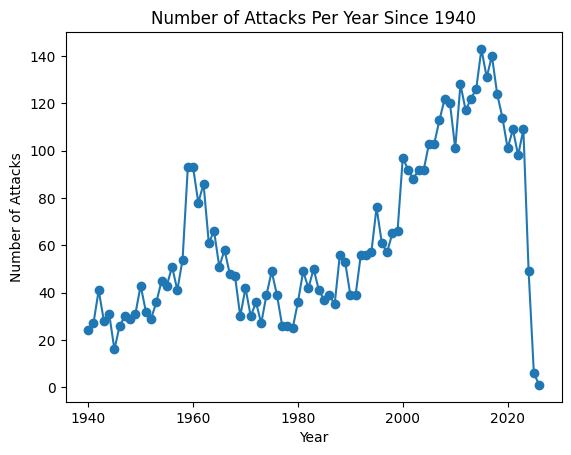

In [10]:

plt.plot(year_counts.index, year_counts.values, marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Number of Attacks Per Year Since 1940")
plt.show()


The attacks seem to be increasing with a spike in 1960s and a huge spike in the 2010s, but in recent years its been low

### Q2.4

In [58]:
df["Age"].value_counts()

Age
17.0    175
20.0    167
18.0    162
15.0    157
19.0    152
       ... 
72.0      1
84.0      1
86.0      1
87.0      1
81.0      1
Name: count, Length: 82, dtype: int64

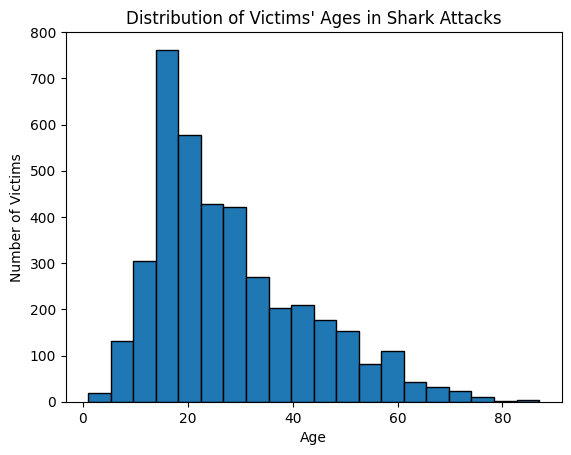

In [57]:
df["Age"] = df["Age"].astype(str).str.extract(r"(\d+)") 


df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

df_cleaned = df.dropna(subset=["Age"])

plt.hist(df_cleaned["Age"], bins=20, edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Number of Victims")
plt.title("Distribution of Victims' Ages in Shark Attacks")
plt.show()


### Q2.5

In [59]:
df["Sex"].value_counts()

Sex
M        5613
F         792
M           2
N           2
 M          1
lli         1
M x 2       1
.           1
Name: count, dtype: int64

In [60]:
df["Sex"] = df["Sex"].astype(str).str.replace(" ", "", regex=True)

df["Sex"] = df["Sex"].apply(lambda x: x if x in ["M", "F"] else np.nan)
df["Sex"].value_counts()

Sex
M    5616
F     792
Name: count, dtype: int64

In [61]:

male_count = (df["Sex"] == "M").sum()
female_count = (df["Sex"] == "F").sum()

total_known_sex = male_count + female_count
male_proportion = male_count / total_known_sex if total_known_sex > 0 else 0

print(f"Proportion of male victims: {male_proportion:.2%}")


Proportion of male victims: 87.64%


### Q2.6

In [62]:
df["Type"].value_counts()

Type
Unprovoked             5153
Provoked                637
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Boat                      7
 Provoked                 2
Unconfirmed               1
?                         1
Unverified                1
Under investigation       1
Name: count, dtype: int64

In [63]:
df["Type"] = df["Type"].astype(str).str.replace(" ", "", regex=True)
df["Type"] = df["Type"].apply(lambda x: x if x in ["Unprovoked", "Provoked"] else "Unknown")
df["Type"].value_counts()

Type
Unprovoked    5153
Unknown       1200
Provoked       639
Name: count, dtype: int64

### Q2.7

In [64]:
# ttoo repetitive
def clean_column(df, column_name):
    df[column_name] = (
        df[column_name]
        .astype(str)              
        .str.strip()               
        .str.replace(r"\s+", " ", regex=True)  
        .str.lower()              
        .str.capitalize()            # Capitalize first letter
    )
    return df


In [65]:
df["Fatal Y/N"].value_counts()


Fatal Y/N
N          4872
Y          1468
UNKNOWN      71
 N            7
F             4
M             3
Nq            1
n             1
2017          1
Y x 2         1
N             1
y             1
Name: count, dtype: int64

In [66]:
df = clean_column(df, "Fatal Y/N")
df["Fatal Y/N"] = df["Fatal Y/N"].apply(lambda x: x if x in ["Y", "N"] else "Unknown")
df["Fatal Y/N"].value_counts()

Fatal Y/N
N          4881
Y          1469
Unknown     642
Name: count, dtype: int64

### Q2.8

In [67]:
unprovoked_df = df[df["Type"] == "Unprovoked"]
unprovoked_gender = unprovoked_df["Sex"].value_counts()
print(unprovoked_gender)


Sex
M    4314
F     670
Name: count, dtype: int64


In [71]:
fatality_by_type = df.groupby("Type")["Fatal Y/N"].value_counts(normalize=True)
print(fatality_by_type)


Type        Fatal Y/N
Provoked    N            0.953052
            Y            0.032864
            Unknown      0.014085
Unknown     Unknown      0.462500
            N            0.374167
            Y            0.163333
Unprovoked  N            0.741898
            Y            0.242965
            Unknown      0.015137
Name: proportion, dtype: float64


In [72]:
fatality_by_sex = df.groupby("Sex")["Fatal Y/N"].value_counts(normalize=True)
print(fatality_by_sex)

Sex  Fatal Y/N
F    N            0.760101
     Y            0.151515
     Unknown      0.088384
M    N            0.697472
     Y            0.220798
     Unknown      0.081731
Name: proportion, dtype: float64


Men are attacked unprovoked more than women, but men are also attacked more often than women in general. It seems to be more fatal if a shark attack is unprovoked, I would guess it is due to the element of surprise. Men seem to die more when attacked by a shark compared to women. I would say my opinion of shark attacks haven't changed. I am not really worried about shark attacks, because I don't swim out far and I also don't go if there is a warning.

### Q2.9

In [74]:
df["Species "].value_counts()

Species 
White shark                                                                                                                                                                                194
Shark involvement prior to death was not confirmed                                                                                                                                         105
Invalid                                                                                                                                                                                    102
Shark involvement not confirmed                                                                                                                                                             92
Tiger shark                                                                                                                                                                                 89
                                    

In [75]:
df = clean_column(df, "Species ")
df["Species "].value_counts()

Species 
Nan                                                   3132
White shark                                            196
Shark involvement prior to death was not confirmed     105
Invalid                                                102
Shark involvement not confirmed                         94
                                                      ... 
Bronze whaler shark, 2 m to 3 m [6.75' to 10']           1
1.8 m [6'] caribbean reef shark                          1
Nurse shark, 3'                                          1
Bronze whaler shark, 4.3 m [14']                         1
Thought to involve a 2.5 m bull or tiger shark           1
Name: count, Length: 1563, dtype: int64

In [76]:

# Check if "white" and "shark" appear in the species information
df["is_white_shark"] = df["Species "].apply(lambda x: "white" in x and "shark" in x)

# Calculate the proportion of attacks involving white sharks
white_shark_proportion = df["is_white_shark"].mean()

print(f"Proportion of attacks by white sharks: {white_shark_proportion:.2%}")


Proportion of attacks by white sharks: 3.49%


## Q4

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?